In [9]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [13]:

image_width = 100
image_height = 100
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(

    "animal3/",
    validation_split = 0.4,
    shuffle = True,
    subset = 'training',
    seed = 1,
    image_size = (image_width, image_height),
    batch_size = batch_size

)


test_data = tf.keras.preprocessing.image_dataset_from_directory(

    "animal3/",
    validation_split = 0.4,
    shuffle = True,
    subset = 'validation',
    seed = 1,
    image_size = (image_width, image_height),
    batch_size = batch_size

)

Found 1587 files belonging to 2 classes.
Using 953 files for training.
Found 1587 files belonging to 2 classes.
Using 634 files for validation.


In [17]:
class_names = train_data.class_names
print(class_names)

['cat', 'dog']


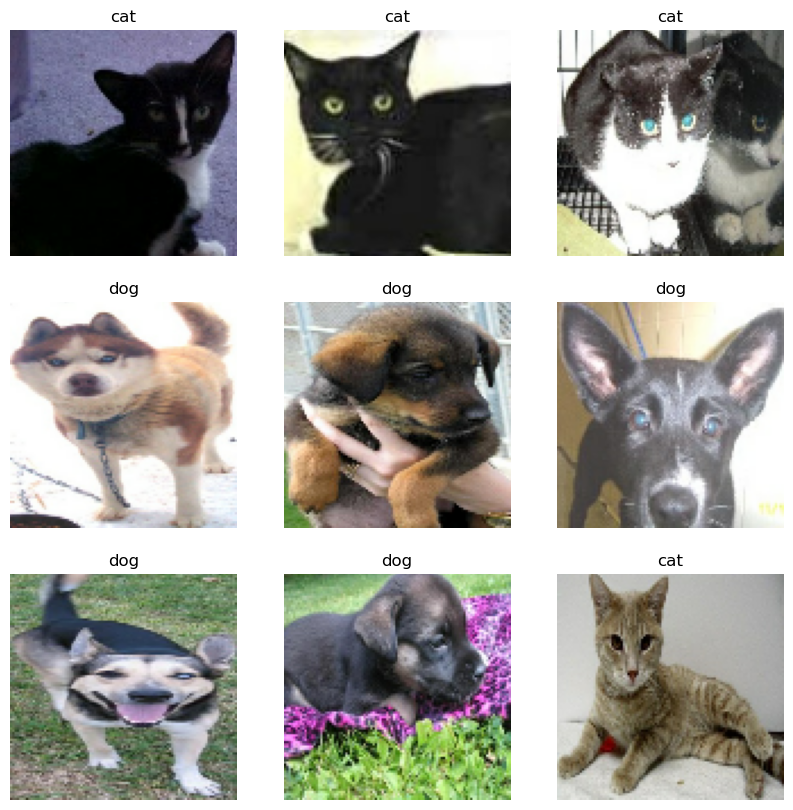

In [23]:
plt.figure(figsize = (10,10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [25]:
def scale(image, label):
    return image/ 255.0, label

train_data = train_data.map(scale)

In [27]:
test_data = test_data.map(scale)

In [61]:
model = Sequential()

model.add(Conv2D(100, 3, activation = "relu", input_shape = (image_width, image_height,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(50,4, activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(100,3,activation = 'relu'))
model.add(MaxPooling2D(3))

model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'SparseCategoricalCrossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             metrics = ['accuracy'])

model.fit(
    train_data,
    epochs = 5,
    validation_data = test_data

)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5071 - loss: 0.6903 - val_accuracy: 0.5442 - val_loss: 0.6864
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5111 - loss: 0.6913 - val_accuracy: 0.5442 - val_loss: 0.6865
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5866 - loss: 0.6769 - val_accuracy: 0.5521 - val_loss: 0.6773
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5878 - loss: 0.6754 - val_accuracy: 0.6372 - val_loss: 0.6649
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6959 - loss: 0.6464 - val_accuracy: 0.5978 - val_loss: 0.6555


In [71]:
layer_out = []
layer_name = []

for layer in model.layers:
    if isinstance(layer,(Conv2D,MaxPooling2D)):
        layer_out.append(layer.output)
        layer_name.append(layer.name)

layer_activations = tf.keras.Model(inputs = model.inputs,
                                   outputs = layer_out)

In [89]:
image1 = tf.keras.utils.load_img("animal3/dog/dog_0152.jpg",
                                target_size = (image_width,image_height))

img = tf.keras.utils.img_to_array(image1)
img = np.expand_dims(img, axis = 0)
img = img/255.0

activations = layer_activations.predict(img)

C:\Users\decke\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_569']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [101]:
activations[0].shape




(1, 98, 98, 100)

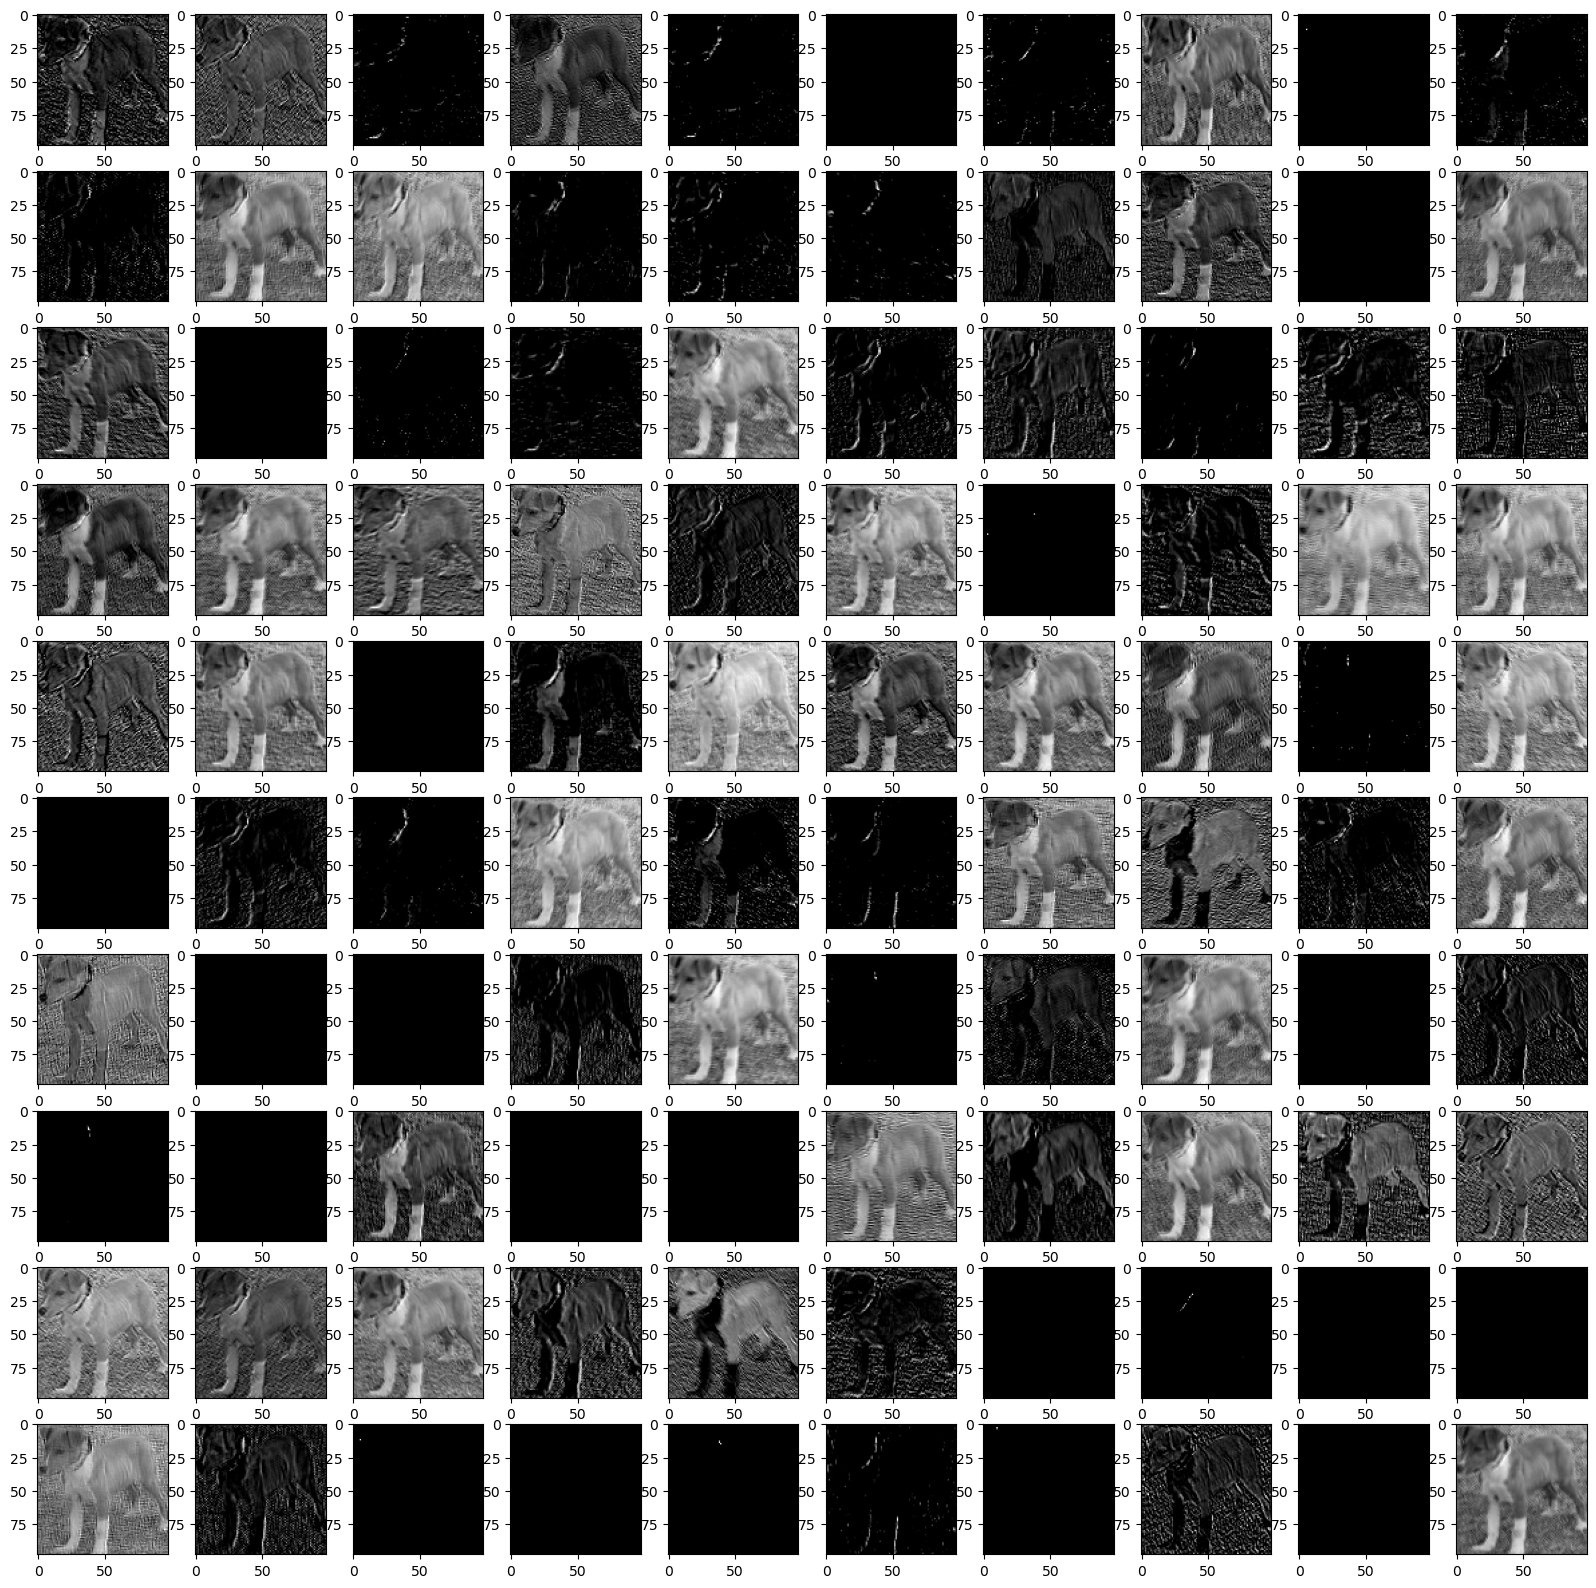

In [111]:
plt.figure(figsize = (20,20))

for c in range(0, activations[0].shape[3]):
    layer_act = activations[0]
    plt.subplot(10,10, int(c) + 1)
    plt.imshow(layer_act[0,:,:,c],cmap="gray")

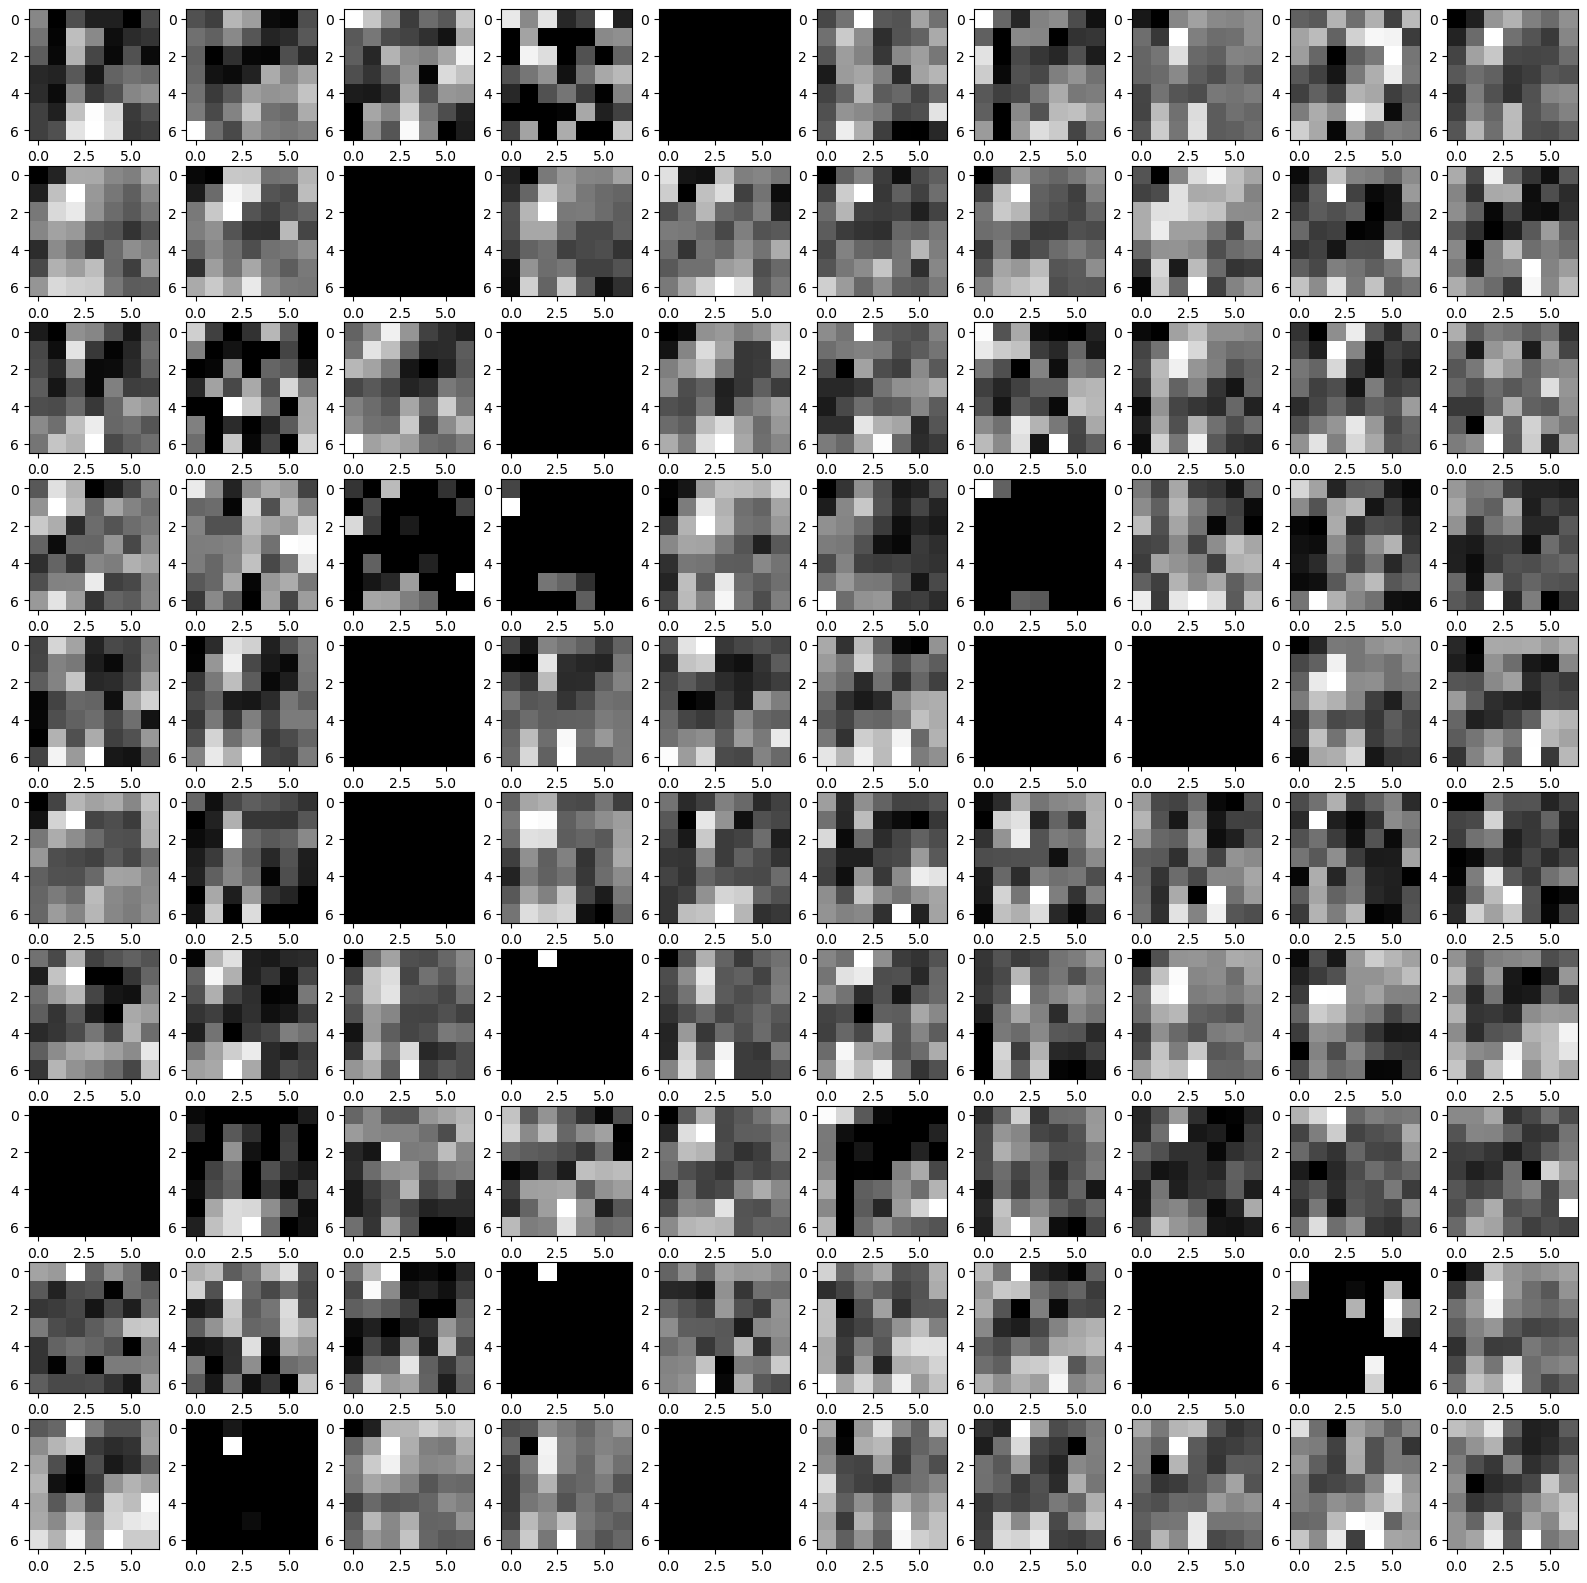

In [113]:
plt.figure(figsize = (20,20))

for c in range(0, activations[5].shape[3]):
    layer_act = activations[5]
    plt.subplot(10,10, int(c) + 1)
    plt.imshow(layer_act[0,:,:,c],cmap="gray")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step


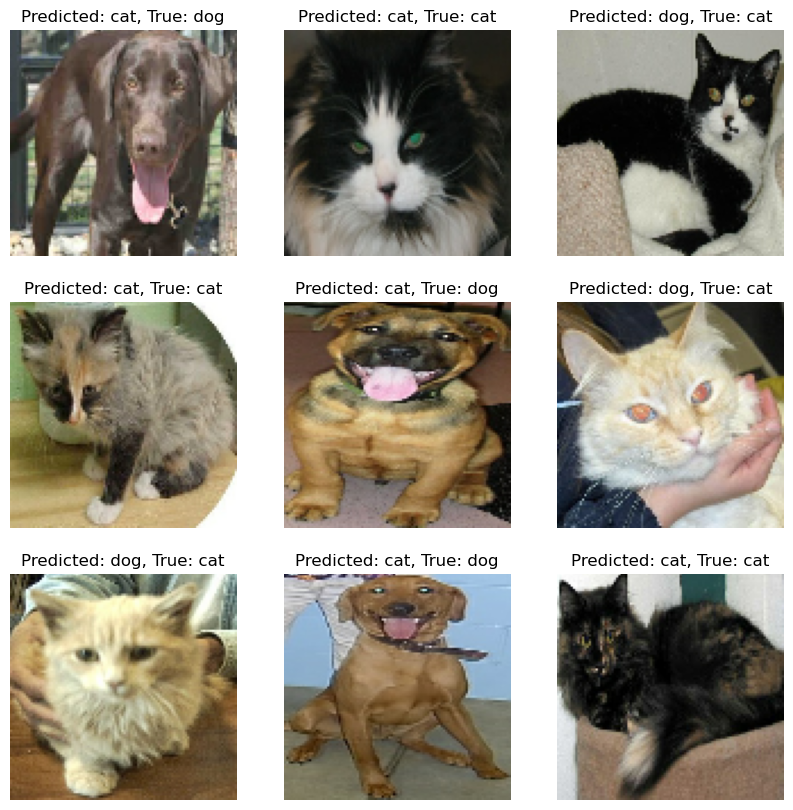

In [115]:
predictions = model.predict(test_data)


plt.figure(figsize = (10,10))

for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        predicted_label = class_names[tf.argmax(predictions[i])]
        true_label = class_names[labels[i]]
        plt.title(f"Predicted: {predicted_label}, True: {true_label}")
        plt.axis("off")
plt.show()